
K=3 | Accuracy: 1.0000 | Cross-Validation Score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       137
           2       1.00      1.00      1.00       133

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408

Confusion Matrix:
[[138   0   0]
 [  0 137   0]
 [  0   0 133]]

K=5 | Accuracy: 1.0000 | Cross-Validation Score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       137
           2       1.00      1.00      1.00       133

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408

Confusion Matrix:
[[138   0   0]
 [  0 137   0]
 [  0   0 13

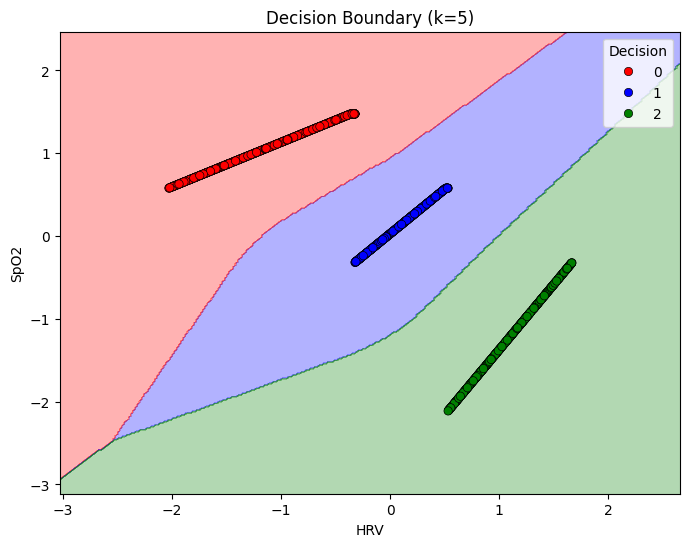

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = 'C:\\Users\\Asus\\Desktop\\ML CW\\archive (5)\\cStick.csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()  # Trim spaces from column names

# Verify required columns
required_columns = {'HRV', 'SpO2', 'Decision'}
if not required_columns.issubset(df.columns):
    raise KeyError(f"Missing columns: {required_columns - set(df.columns)}")

# Handle missing values
df.dropna(subset=['HRV', 'SpO2', 'Decision'], inplace=True)

# Define Features (X) and Target (y)
X = df[['HRV', 'SpO2']]
y = df['Decision']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test multiple k-values
k_values = [3, 5, 7, 10]
results = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    cv_score = cross_val_score(knn, X_train_scaled, y_train, cv=5).mean()
    results[k] = {'accuracy': acc, 'cv_score': cv_score}
    print(f"\nK={k} | Accuracy: {acc:.4f} | Cross-Validation Score: {cv_score:.4f}")
    print(classification_report(y_test, y_pred, zero_division=1))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Plot Decision Boundaries (for k=5 as example)
def plot_decision_boundary(X, y, model, title):
    h = 0.02  # Step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'blue', 'green']))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['red', 'blue', 'green'], edgecolor='k')
    plt.xlabel('HRV')
    plt.ylabel('SpO2')
    plt.title(title)
    plt.show()

knn_best = KNeighborsClassifier(n_neighbors=5)
knn_best.fit(X_train_scaled, y_train)
plot_decision_boundary(X_train_scaled, y_train, knn_best, "Decision Boundary (k=5)")

TypeError: seaborn.utils._scatter_legend_artist() got multiple values for keyword argument 'label'

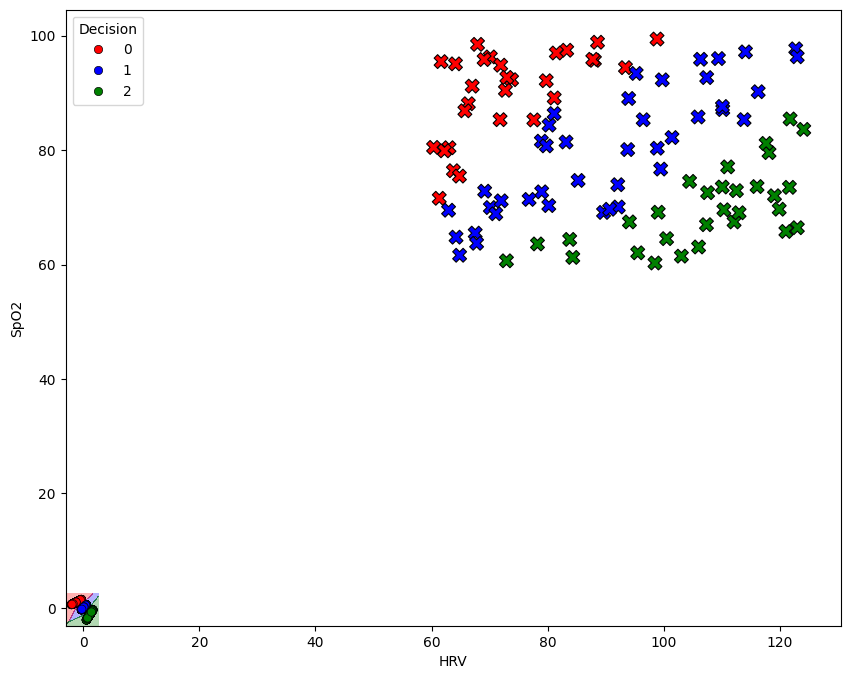

In [3]:
# Generate random in-range values for HRV and SpO2
np.random.seed(42)  # For reproducibility
num_random_samples = 100  # Number of random samples to generate
random_HRV = np.random.uniform(X['HRV'].min(), X['HRV'].max(), num_random_samples)
random_SpO2 = np.random.uniform(X['SpO2'].min(), X['SpO2'].max(), num_random_samples)

# Create a DataFrame for the random data
random_data = pd.DataFrame({'HRV': random_HRV, 'SpO2': random_SpO2})

# Standardize the random data using the same scaler
random_data_scaled = scaler.transform(random_data)

# Predict decisions for the random data
random_decisions = knn_best.predict(random_data_scaled)

# Add predictions to the random data DataFrame
random_data['Decision'] = random_decisions

# Plot the decision boundary with the random points
def plot_decision_boundary_with_random(X, y, random_data, model, title):
    h = 0.02  # Step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'blue', 'green']))

    # Plot the training data points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['red', 'blue', 'green'], edgecolor='k')

    # Plot the random data points with their predicted decisions
    sns.scatterplot(x=random_data['HRV'], y=random_data['SpO2'], hue=random_data['Decision'],
                    palette=['red', 'blue', 'green'], marker='X', s=100, edgecolor='k', label='Random Data')

    plt.xlabel('HRV')
    plt.ylabel('SpO2')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot the decision boundary with random points
plot_decision_boundary_with_random(X_train_scaled, y_train, random_data, knn_best, "Decision Boundary with Random Points (k=5)")